<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Introduction to Quant Platform

**Brief Overview and Introduction**
(needs Python 2.7 on the platform)

Dr. Yves J. Hilpisch

The Python Quants GmbH

<a href='http://fpq.io'>http://fpq.io</a> | <a href='mailto:team@tpq.io'>team@tpq.io</a>

## The Platform

At the moment, the Python Quant Platform comprises the following **components and features**:

* **Jupyter Notebook**: interactive data and financial analytics in the browser with full **Python** integration and much more (cf. <a href="http://www.ipython.org">IPython home page</a>).
* **Anaconda Python Distribution**: complete **Python stack** for financial, scientific and data analytics workflows/applications (cf. <a href="http://continuum.io/downloads">Anaconda page</a>); you can easily switch between **Python 2.7 and 3.4**.
* **DX Analytics**: our library for advanced **financial and derivatives analytics** with Python based on Monte Carlo simulation.
* **File Manager**: a GUI-based File Manager to upload, download, copy, remove, rename files on the platform.
* **Web Editor**: full-fledged Code Editor for many different languages (like Python, HTML, CSS, etc.)
* **Chat/Forum**: there is a simple chat/forum application available via which you can share thoughts, documents and more.
* **Collaboration**: the platform features **user/group administration** as well as **file sharing** via private and public folders.
* **Linux Server**: the platform is powered by Linux servers to which you have full **shell access**.
* **Deployment**: the platform is easily scalable since it is **cloud-based** and can also be easily deployed on your own servers (via <a href="http://docker.com">Docker containers</a>).

<img src="http://hilpisch.com/pqp_overview.png" alt="PQP Overview" width="100%" align="center" border="0"><br>

## Jupyter Notebook

In the left panel of the platform, you find the **current working path** indicated (in black) as well as the current **folder and file structure** (as links in blue). Note that in this panel **only Jupyter Notebook files** are displayed. Here you can navigate the current folder structure by **clicking on a link**. Clicking on the **double points ".."** brings you one level up in the structure. Clicking the **refresh** button right next to the double points updates the folder/file structure. **Clicking on a file link** opens the IPython Notebook file.

### Basic Approach

You find a link to open a **new notebook** on top of the left panel. With Jupyter notebooks, like with this one, you can interactively code in Python and do data/financial analytics.

In [1]:
print ("Hello Quant World.")

Hello Quant World.


In [2]:
# simple calculations
3 + 4 * 2

11

In [3]:
# working with NumPy arrays
import numpy as np
rn = np.random.standard_normal(100)
rn[:10]

array([ 0.23721516,  1.2834633 ,  2.32174616,  0.49668327, -0.12416932,
        1.29271484,  1.08793236, -1.1446346 , -0.85850417, -0.59827569])

/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


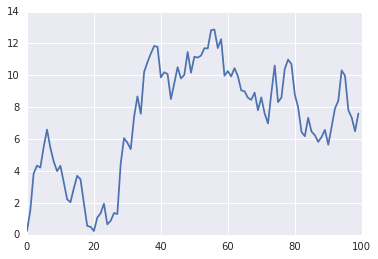

In [4]:
# plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
plt.plot(rn.cumsum())
plt.grid(True)

If you are new to Jupyter Notebook, you could start on the Jupyter home page [http://jupyter.org](http://jupyter.org) and might want to check out the documentation provided there.

### Efficient Financial Analytics

Combining the **pandas** library with Jupyter Notebook makes for a powerful financial analytics environment.

In [5]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import pandas.io.data as web

In [6]:
AAPL = web.DataReader('AAPL', data_source='google')
  # reads data from Google Finance
AAPL['42d'] = pd.rolling_mean(AAPL['Close'], 42)
AAPL['252d'] = pd.rolling_mean(AAPL['Close'], 252)
  # 42d and 252d trends

In [7]:
AAPL.tail()

,Open,High,Low,Close,Volume,42d,252d
Date,,,,,,,
2016-08-23,108.59,109.32,108.53,108.85,21257669,101.785714,105.090952
2016-08-24,108.56,108.75,107.68,108.03,23675081,102.134048,105.107976
2016-08-25,107.39,107.88,106.68,107.57,25086248,102.503810,105.099563
2016-08-26,107.41,107.95,106.31,106.94,27766291,102.821667,105.075833
2016-08-29,106.62,107.44,106.29,106.82,24970300,103.117381,105.050159


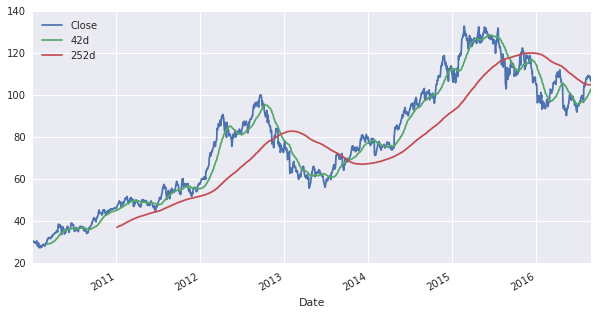

In [8]:
AAPL[['Close', '42d', '252d']].plot(figsize=(10, 5), grid=True);

## Using R from within IPython

Loading the **R** extension for IPython.

In [9]:
# only Python 2.7
%load_ext rpy2.ipython

Pushing **data to R**.

In [10]:
AAPL_close = AAPL['Close'].values

In [11]:
AAPL_close

array([  30.57,   30.63,   30.14, ...,  107.57,  106.94,  106.82])

In [12]:
%Rpush AAPL_close

**Plotting** data with R.

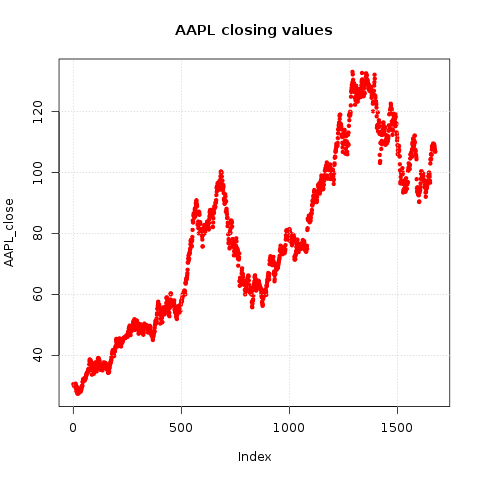

In [13]:
%R plot(AAPL_close, pch=20, col='red'); grid(); title("AAPL closing values")

## DX Analytics

DX Analytics is a Python library for advanced **financial and derivatives analytics** written by The Python Quants. It is particularly suited to model **multi-risk derivatives** and to do a **consistent valuation of portfolios** of complex derivatives. It mainly uses **Monte Carlo simulation** since it is the only numerical method capable of valuing and risk managing complex, multi-risk derivatives books.  

In [16]:
# only Python 2.7
import dx
%run dx_example.py
  # sets up market environments
  # and defines derivative instrument

In [17]:
max_call.payoff_func
  # payoff of a maximum call option
  # on two underlyings (European exercise)

"np.maximum(np.maximum(maturity_value['gbm'], maturity_value['jd']) - 34., 0)"

In [18]:
max_call.vega('jd')
  # numerical Vega with respect
  # to one risk factor

3.0537

We are going to generate a **Vega surface** for one risk factor with respect to the initial values of both risk factors. 

In [19]:
asset_1 = np.arange(28., 46.1, 2.)
asset_2 = asset_1
a_1, a_2 = np.meshgrid(asset_1, asset_2)
value = np.zeros_like(a_1)

In [20]:
%%time
vega_gbm = np.zeros_like(a_1)
for i in range(np.shape(vega_gbm)[0]):
    for j in range(np.shape(vega_gbm)[1]):
        max_call.update('gbm', initial_value=a_1[i, j])
        max_call.update('jd', initial_value=a_2[i, j])
        vega_gbm[i, j] = max_call.vega('gbm')

CPU times: user 3.8 s, sys: 0 ns, total: 3.8 s
Wall time: 3.8 s


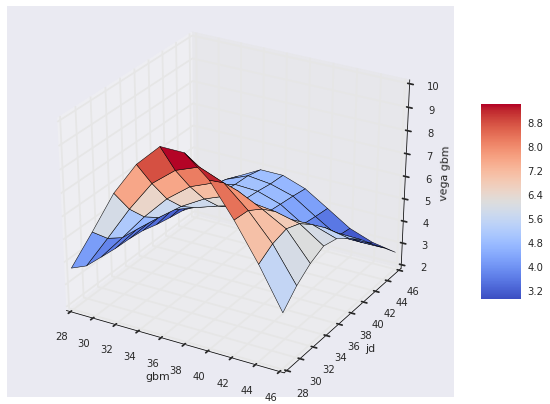

In [21]:
dx.plot_greeks_3d([a_1, a_2, vega_gbm], ['gbm', 'jd', 'vega gbm'])
  # Vega surface plot

## File Manager

The File Manager allows the easy, **GUI-based file management** on the platform.

### Left Column

In the **left column** you can navigate the file system. For instance, you find a folder called `public` which you can use to share files with others.

<img src="http://hilpisch.com/pqp_fileman.png" alt="PQP File Manager" width="100%" align="center" border="0"><br>

### Right Column

In the **right column**, you find the *contents of the folder* currently active in the left column. The content is updated by clicking on the **refresh** button. You can, for example, **drag and drop** files and folders as well as **upload** files from you local disk. For uploading, you have to do the following:

1. press the **add files** button
2. select (multiple) file(s) from your local disk
3. press the **upload** button

Via a **right click** on a file, you can e.g. **download** it. In addition, via a **right click** on a file, you can:

* **delete** a file/folder
* **rename** a file/folder
* **zip** a file/folder
* **generate a new folder**
* **use Git**
* do much more ...

All file operations are only implementable based on the respective user's **rights on the operating system level**. For example, everybody can copy a file to the `public` folder. This file can then be read and executed by everybody, but only the "owner" of the file can overwrite or delete it.

## Shell Access

This component of the platform allows the **shell-based access to the Linux server**. This part of the platform requires a **separate login** for security reasons (credentials available upon request).

### IPython Shell

For example, you can also interactively code on the shell via **IPython Shell**. The IPython Shell version is started by simply typing `ipython` in the system shell.

<img src="http://hilpisch.com/pqp_ipython.png" alt="PQP IPython" width="100%" align="center" border="0"><br>

### Text Editing and Coding

Via the system shell you can of course edit any kind of text document and file with computer code, e.g. Python. To this end, you can  use **Vim** which is started via typing `vim filename` on the system shell or alternatively **Nano** (started by `nano filename`).

<img src="http://hilpisch.com/pqp_vimedit.png" alt="PQP Vim Editing" width="100%" align="center" border="0"><br>

### File Operations and Git Repositories

Of course, you can do anything else via the system shell given your personal rights on the operating system level. Among others, you can:

* do **file operations** (copying, renaming, moving, etc.)
* use **Git repositories** (to clone/pull projects, commit and push them)

## Further Resources

### Consulting and Development Services

The Python Quants group provides **consulting and development** services with a focus on **Python for Finance**. The team consists of Python and Financial experts with comprehensive experience in the financial industry and in particular in the Quant Finance space.

For example, The Python Quants have designed and implemented a **Python-based Tutorial** for Eurex, one of the leading derivatives exchanges in the world. The tutorial is about volatility derivatives and is called **VSTOXX Advanced Services** and is available under <a href="http://www.eurexchange.com/vstoxx/" target="_blank">http://www.eurexchange.com/vstoxx/</a>. There are is also strategy backtesting application available under <a href="http://www.eurexchange.com/vstoxx/app2/" target="_blank">http://www.eurexchange.com/vstoxx/app2/</a>

### Python for Quant Finance Trainings

The Python Quants group offers trainings on a global basis. Training offerings include, among others:

* **Python for Financial Data Science**
* **Python for Algorithmic Trading**
* **Python for Computational Finance**

During trainings, the Quant Platform is used for a frictionless start and a highly interactive, collaborative training experience. See http://training.tpq.io.

### Python for Quant Finance Books

There are **three books** available from The Python Quants group about Python for Quant Finance.

#### Python for Finance

If you are working in (Quant) Finance and want to use Python for developing interactive analytics workflows or more complex financial applications, then this book is the right source for you. You can order at it at <a href="http://www.amazon.com" target="_blank">Amazon</a> or at <a href="http://shop.oreilly.com/product/0636920032441.do" target="_blank">O'Reilly</a>. 

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="45%" align="center" border="0"><br>

See <a href="http://python-for-finance.com" target="_blank">http://python-for-finance.com</a> and <a href="http://shop.oreilly.com/product/0636920032441.do" target='_blank'>O'Reilly book page</a>.

#### Derivatives Analytics with Python

The second book by The Python Quants group is about **advanced, market-based derivatives analytics** and uses Python to illustrate and implement all numerical methods introduced (Fourier-based option pricing, Monte Carlo simulation, option model calibration, hedging).

<img style="border:0px solid grey;" src="http://hilpisch.com/images/derivatives_analytics_front.jpg" alt="Derivatives Analytics with Python" width="45%" align="center" border="0"><br>

The book was published in **July 2015 by Wiley Finance**.

See <a href="http://derivatives-analytics-with-python.com" target="_blank">http://derivatives-analytics-with-python.com</a> and <a href="http://eu.wiley.com/WileyCDA/WileyTitle/productCd-1119037999.html" target='_blank'>Wiley book page</a>.

#### Listed Volatility and Variance Derivatives

The third book is about **listed volatility and variance derivatives** and illustrates the major concepts in this regard by the use of Python.

<img style="border:0px solid grey;" src="http://hilpisch.com/images/lvvd_cover.png" alt="Listed Derivatives" width="45%" align="center" border="0"><br>

The book will be published in **in 2016 by Wiley Finance**.

See <a href="http://lvvd.tpq.io" target="_blank">http://lvvd.tpq.io</a> and <a href="http://eu.wiley.com/WileyCDA/WileyTitle/productCd-1119167914.html" target='_blank'>Wiley book page</a>.

### Community and Conferences

Members of The Python Quant group are actively involved in the Python community and organize different meetup groups both in Europe as well as in New York City:

* <a href="http://www.meetup.com/Python-for-Quant-Finance-London/" target="_blank">Python for Quant Finance London</a>
* <a href="http://www.meetup.com/Python-for-Quant-Finance-NYC/" target="_blank">Python for Quant Finance NYC</a>
* <a href="http://www.meetup.com/Python-Big-Data-Analytics/" target="_blank">Python Big Data Analytics Berlin</a>

The Python Quants also organize the largest **"For Python Quants" conference** in the world. At the first NYC conference in March 2014, more than 220 people have been in attendance (cf. <a href="http://fpq.io" target="_blank">http://fpq.io</a>). The last four took place in **London on 28. November 2014**, **New York on 01. May 2015**, **London on 27. November 2015** and **New York on 06. May 2016**.

## Contact us

Please contact us if you have any questions or want to get involved in our Python community events.

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="mailto:yves@tpq.io">yves@tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="http://hilpisch.com" target="_blank">http://hilpisch.com</a> 

**Quant Platform** &mdash; <a href="http://quant-platform.com" target="_blank">http://quant-platform.com</a>

**Python for Finance** &mdash; <a href="http://python-for-finance.com" target="_blank">http://python-for-finance.com</a>

**Derivatives Analytics with Python** &mdash; <a href="http://derivatives-analytics-with-python.com" target="_blank">http://derivatives-analytics-with-python.com</a>

**Python Trainings** &mdash; <a href="http://training.tpq.io" target="_blank">http://training.tpq.io</a>